### 1. Download the dataset

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-11-04 10:20:05--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.03s   

2025-11-04 10:20:05 (26.6 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



### 2. Data Preparation

- Fill missing values with zeros.
- Do train/validation/test split with 60%/20%/20% distribution.
- Use the train_test_split function and set the random_state parameter to 1.
- Use DictVectorizer(sparse=True) to turn the dataframes into matrices.



In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import root_mean_squared_error
from sklearn.tree import export_text
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv("car_fuel_efficiency.csv")
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [3]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [4]:
# Fill missing values with zeros
df = df.fillna(0)

In [5]:
# split the dataset
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)


In [6]:
# reset index
df_train = df_train.reset_index(drop= True)
df_val = df_val.reset_index(drop= True)
df_test = df_test.reset_index(drop= True)

In [7]:
# define target variable
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [8]:
# delete target from dataframes
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [9]:
df_train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(df_train_dict)
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 58220 stored elements and shape (5822, 14)>

### 3. Model Training and Evaluation

In [10]:
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [11]:
# validation
df_val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(df_val_dict)
y_pred = dtr.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
rmse


1.6104639028827594

#### Q1. Let's train a decision tree regressor to predict the fuel_efficiency_mpg variable.

Train a model with max_depth=1.
Which feature is used for splitting the data?

- 'vehicle_weight'
- 'model_year'
- 'origin'
- 'fuel_type'

In [12]:
print(export_text(dtr, feature_names=list(dv.get_feature_names_out())))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



#### Q2 Train a random forest regressor with these parameters:

- n_estimators=10
- random_state=1
- n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on the validation data?

In [13]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(
    n_estimators=10,
    random_state=1,
    n_jobs=-1
)
rfr.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
# validation
y_pred = rfr.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
rmse

0.4595777223092726

#### Question 3
Now let's experiment with the n_estimators parameter
- Try different values of this parameter from 10 to 200 with step 10.
- Set random_state to 1.
- Evaluate the model on the validation dataset.

After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.
- 10
- 25
- 80
- 200

If it doesn't stop improving, use the latest iteration number in your answer.

In [20]:
scores = []

for n in range(10, 201, 10):
    rfr = RandomForestRegressor(
        n_estimators=n,
        random_state=1,
        n_jobs=-1
    )

    # training
    rfr.fit(X_train, y_train)

    # validation
    y_pred = rfr.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)

    scores.append((n, rmse))

In [21]:
columns = ['n_estimators', 'rsme']
df_scores = pd.DataFrame(scores, columns= columns)
df_scores.head()


,n_estimators,rsme
0,10,0.459578
1,20,0.453591
2,30,0.451687
3,40,0.448721
4,50,0.446657


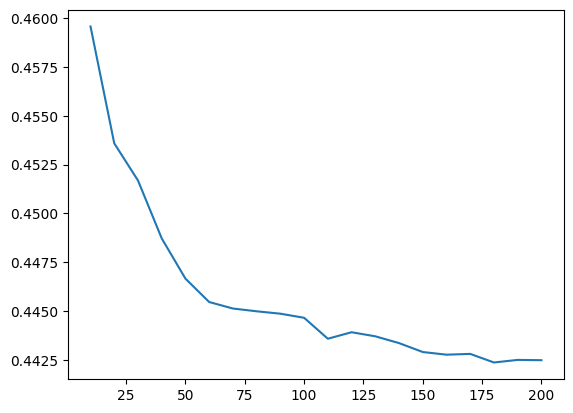

In [24]:
plt.plot(df_scores.n_estimators, df_scores.rsme)

#### Question 4
Let's select the best max_depth:

- Try different values of max_depth: [10, 15, 20, 25]
- For each of these values,
    - try different values of n_estimators from 10 till 200 (with step 10)
    - calculate the mean RMSE
- Fix the random seed: random_state=1

What's the best max_depth, using the mean RMSE?

- 10
- 15
- 20
- 25


In [15]:
n_estimators = 200

In [16]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rfr = RandomForestRegressor(
            n_estimators=n,
            max_depth=d,
            random_state=1,
            n_jobs=-1
        )

        # training
        rfr.fit(X_train, y_train)

        # validation
        y_pred = rfr.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)

        scores.append((d, n, rmse))


In [17]:
columns = ['max_depth', 'n_estimators', 'rsme']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,max_depth,n_estimators,rsme
0,10,10,0.450249
1,10,20,0.446857
2,10,30,0.445474
3,10,40,0.443067
4,10,50,0.441957
...,...,...,...
75,25,160,0.442800
76,25,170,0.442843
77,25,180,0.442409
78,25,190,0.442534


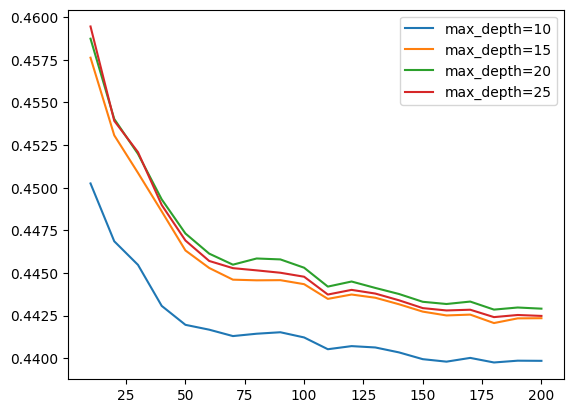

In [18]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.rsme, label=f'max_depth={d}')

plt.legend()

#### Question 5
We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

Train the model with these parameters:
- n_estimators=10,
- max_depth=20,
- random_state=1,
- n_jobs=-1 (optional)

Get the feature importance information from this model
What's the most important feature (among these 4)?

- vehicle_weight
- horsepower
- acceleration
- engine_displacement

In [19]:
rfr = RandomForestRegressor(
            n_estimators=10,
            max_depth=20,
            random_state=1,
            n_jobs=-1
        )

# training
rfr.fit(X_train, y_train)

# validation
y_pred = rfr.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
rmse

0.45873868286340574

In [20]:
# get the feature importance
importance = rfr.feature_importances_
feature_names = dv.get_feature_names_out()
for name, imp in zip(feature_names, importance):
    print(f'{name}: {imp}')

acceleration: 0.01147970063142938
drivetrain=All-wheel drive: 0.0003571085493021933
drivetrain=Front-wheel drive: 0.00034538411263183535
engine_displacement: 0.0032727919136094864
fuel_type=Diesel: 0.000325424322869738
fuel_type=Gasoline: 0.00036038360069172865
horsepower: 0.015997897714266237
model_year: 0.003212300094794675
num_cylinders: 0.0023433469524512048
num_doors: 0.0016349895439306998
origin=Asia: 0.0004622464955097423
origin=Europe: 0.000518739638586969
origin=USA: 0.0005397216891829147
vehicle_weight: 0.9591499647407432
